# ColumnTransformers: Extra

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder

In [2]:
df = sns.load_dataset('flights')
df['x'] = range(144)

<AxesSubplot:ylabel='passengers'>

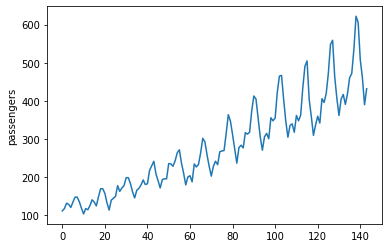

In [3]:
sns.lineplot(data=df, x=df.index, y='passengers')

In [4]:
X = df[['x', 'month', 'year']]
y = df['passengers']

In [5]:
X.head()

,x,month,year
0,0,Jan,1949
1,1,Feb,1949
2,2,Mar,1949
3,3,Apr,1949
4,4,May,1949


### 1. Simple ColumnTransformer

In [6]:
col = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False), ['month']),
    ('three_blue_cats', 'passthrough', ['x', 'year'])
])

Xnew = col.fit_transform(X)
Xnew.shape

(144, 14)

In [7]:
m = LinearRegression()
m.fit(Xnew, y)
ypred = m.predict(Xnew)
mean_squared_error(y, ypred)

630.6943908232976

In [8]:
poly_and_scale = make_pipeline(PolynomialFeatures(degree=10),
                               MinMaxScaler())

#f = make_pipeline(FunctionTransformer(make_month_year),
#                  KBinsDiscretizer)

col = ColumnTransformer([
    ('poly', poly_and_scale, ['x']),                    # <-- 11
    ('onehot', OneHotEncoder(sparse=False), ['month']), # <-- 12
    ('three_blue_cats', 'passthrough', ['x', 'year'])   # <--  2
])

Xnew = col.fit_transform(df)
Xnew.shape
# Xnew is a Numpy array = NO LABELS!

# Kristians dirty hack to put labels back in
labels = [f'poly{i}' for i in range(11)] + [c for c in 'JFMAMJJASOND'] + ['x', 'year']
pd.DataFrame(Xnew, columns=labels)

,poly0,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9,...,M,J,J,A,S,O,N,D,x,year
0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1949.0
1,0.0,0.006993,0.000049,3.419731e-07,2.391420e-09,1.672322e-11,1.169456e-13,8.178012e-16,5.718889e-18,3.999223e-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1949.0
2,0.0,0.013986,0.000196,2.735784e-06,3.826272e-08,5.351429e-10,7.484516e-12,1.046786e-13,1.464036e-15,2.047602e-17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1949.0
3,0.0,0.020979,0.000440,9.233272e-06,1.937050e-07,4.063742e-09,8.525332e-11,1.788531e-12,3.752163e-14,7.871671e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1949.0
4,0.0,0.027972,0.000782,2.188628e-05,6.122035e-07,1.712457e-08,4.790091e-10,1.339885e-11,3.747931e-13,1.048372e-14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,0.972028,0.944838,9.184093e-01,8.927196e-01,8.677484e-01,8.434757e-01,8.198820e-01,7.969482e-01,7.746560e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,1960.0
140,0.0,0.979021,0.958482,9.383741e-01,9.186879e-01,8.994147e-01,8.805459e-01,8.620729e-01,8.439874e-01,8.262814e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140.0,1960.0
141,0.0,0.986014,0.972224,9.586260e-01,9.452187e-01,9.319988e-01,9.189639e-01,9.061113e-01,8.934384e-01,8.809427e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,141.0,1960.0
142,0.0,0.993007,0.986063,9.791673e-01,9.723200e-01,9.655206e-01,9.587687e-01,9.520640e-01,9.454062e-01,9.387950e-01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,142.0,1960.0


In [9]:
m = LinearRegression()
m.fit(Xnew, y)
ypred = m.predict(Xnew)
mean_squared_error(y, ypred)

426.967560249291

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

poly = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                     MinMaxScaler())

col = ColumnTransformer([
    ('polyx', poly, ['x']),    
    ('onehot', OneHotEncoder(sparse=False), ['month']),
], remainder='passthrough')

# bin the 3rd polynomial of x
# Use column indexes to specify which column
col2 = ColumnTransformer([
     ('polyx', KBinsDiscretizer(), [2]), # WE CANNOT USE THE LABELS
], remainder='passthrough')

p = make_pipeline(
    col,   # eliminates all the labels
    col2,
    PolynomialFeatures(interaction_only=True),
    MinMaxScaler(),
)
p.fit(df)  # train
Xnew = p.transform(df)
# also: p.transform(Xtest)
Xnew.shape

(144, 232)

<AxesSubplot:>

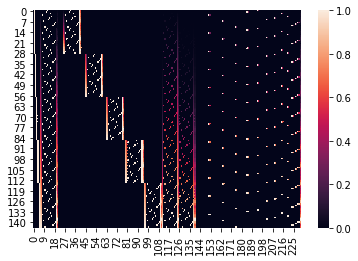

In [11]:
sns.heatmap(Xnew)

In [12]:
# how to find out the index number of a column?
# 1. run a ColTrans alone
# 2. inspect the result
pd.DataFrame(col.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1949.0,112.0
1,0.006993,0.000049,3.419731e-07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1949.0,118.0
2,0.013986,0.000196,2.735784e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1949.0,132.0
3,0.020979,0.000440,9.233272e-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1949.0,129.0
4,0.027972,0.000782,2.188628e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1949.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.972028,0.944838,9.184093e-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,606.0
140,0.979021,0.958482,9.383741e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1960.0,508.0
141,0.986014,0.972224,9.586260e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1960.0,461.0
142,0.993007,0.986063,9.791673e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1960.0,390.0


In [13]:
# we put pipelines in a ColTrans in a pipeline
